# Test the breast cancer data on different clustering methods

### import packages:

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os

### Load and clean data:

In [2]:
# Read the data file
data = pd.read_csv('../data/data.csv')
print (data.shape)
data.head(5)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [43]:
# To understand the types of different variables.
#(identify objects variables)
data.dtypes 

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [5]:
#check balans in perentage using value_counts and normalize =True
data.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [6]:
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [7]:
# clean data
data= data.drop('Unnamed: 32',axis=1)

data = data.drop('id',axis=1) # To prepare the data for correlation
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [8]:
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

### Correlation:

In [9]:
# Specify the indices or column names of the columns you want to standardize
float_columns = float_columns = [x for x in data.columns if x not in ['diagnosis']]

# The correlation matrix
corr_mat = data[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,0.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,0.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,0.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,0.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,0.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,0.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,0.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,0.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,0.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,0.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [10]:
# see with features are highly correlated
# Pairwise maximal correlations
corr_mat.abs().idxmax()

radius_mean                         perimeter_mean
texture_mean                         texture_worst
perimeter_mean                         radius_mean
area_mean                              radius_mean
smoothness_mean                   smoothness_worst
compactness_mean                    concavity_mean
concavity_mean                 concave points_mean
concave points_mean                 concavity_mean
symmetry_mean                       symmetry_worst
fractal_dimension_mean     fractal_dimension_worst
radius_se                             perimeter_se
texture_se                             symmetry_se
perimeter_se                             radius_se
area_se                                  radius_se
smoothness_se                 fractal_dimension_se
compactness_se                fractal_dimension_se
concavity_se                        compactness_se
concave points_se                     concavity_se
symmetry_se                          symmetry_mean
fractal_dimension_se           

In [11]:
# how much are they correlated? Can we eliminate certain features based on high correlations
corr_mat.abs().max() 
# It shows from the previous command, for example the correlation between diagnosis and concave_points_worst are 0.793566

radius_mean                0.997855
texture_mean               0.912045
perimeter_mean             0.997855
area_mean                  0.987357
smoothness_mean            0.805324
compactness_mean           0.883121
concavity_mean             0.921391
concave points_mean        0.921391
symmetry_mean              0.699826
fractal_dimension_mean     0.767297
radius_se                  0.972794
texture_se                 0.411621
perimeter_se               0.972794
area_se                    0.951830
smoothness_se              0.427374
compactness_se             0.803269
concavity_se               0.801268
concave points_se          0.771804
symmetry_se                0.449137
fractal_dimension_se       0.803269
radius_worst               0.993708
texture_worst              0.912045
perimeter_worst            0.993708
area_worst                 0.984015
smoothness_worst           0.805324
compactness_worst          0.892261
concavity_worst            0.892261
concave points_worst       0

In [12]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
dtype: float64

In [13]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])

In [15]:
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [16]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.138030,-2.073335,1.281628,1.130319,1.568466,3.150675,2.567947,2.487638,2.217515,...,1.764045,-1.359293,2.022158,1.794344,1.307686,2.479386,2.003224,2.296076,2.682614,1.939736
1,1,1.711783,-0.353632,1.597721,1.713327,-0.826962,-0.481575,0.011104,0.571874,0.001392,...,1.706795,-0.369203,1.502321,1.737118,-0.375612,-0.411700,-0.077623,1.087084,-0.228740,0.292501
2,1,1.524183,0.456187,1.509470,1.511457,0.942210,1.076890,1.393265,2.021815,0.939685,...,1.490832,-0.023974,1.362620,1.493444,0.527407,1.146233,0.929353,1.955000,1.177854,0.211979
3,1,-0.774335,0.253732,-0.550424,-0.843470,3.283553,3.256221,1.908415,1.460738,2.867383,...,-0.179580,0.133984,-0.130272,-0.494860,3.394275,3.449402,1.907919,2.175786,5.487455,4.813255


### Pairplot: 
To figure out the relationship between the variables in a scatter plot:

In [1]:
# sns.set_context('notebook')
# sns.pairplot(data[float_columns + ['diagnosis']], 
#              hue='diagnosis');

#### It takes too long to run and gets the jupyter file so big and I could not upload on Git. So I maked it as comment. But it is run. 

### K-means clustering method:

In [17]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[float_columns]) # not including quality or color columns

data['kmeans'] = km.predict(data[float_columns]) #create a new column with result

In [18]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,kmeans
0,1,1.138030,-2.073335,1.281628,1.130319,1.568466,3.150675,2.567947,2.487638,2.217515,...,-1.359293,2.022158,1.794344,1.307686,2.479386,2.003224,2.296076,2.682614,1.939736,1
1,1,1.711783,-0.353632,1.597721,1.713327,-0.826962,-0.481575,0.011104,0.571874,0.001392,...,-0.369203,1.502321,1.737118,-0.375612,-0.411700,-0.077623,1.087084,-0.228740,0.292501,1
2,1,1.524183,0.456187,1.509470,1.511457,0.942210,1.076890,1.393265,2.021815,0.939685,...,-0.023974,1.362620,1.493444,0.527407,1.146233,0.929353,1.955000,1.177854,0.211979,1
3,1,-0.774335,0.253732,-0.550424,-0.843470,3.283553,3.256221,1.908415,1.460738,2.867383,...,0.133984,-0.130272,-0.494860,3.394275,3.449402,1.907919,2.175786,5.487455,4.813255,1
4,1,1.652935,-1.151816,1.663405,1.667470,0.280372,0.569623,1.400416,1.438255,-0.009560,...,-1.466770,1.355825,1.346061,0.220556,-0.280508,0.700235,0.729259,-0.888983,-0.395358,1


In [25]:
#check how it is fit
kmean_groups = (data[['diagnosis','kmeans']]
 .groupby(['kmeans','diagnosis'])
 .size()
 .to_frame()) #to change to dataframe
 #.rename(columns={0:'number'}))
### END SOLUTION

In [26]:
kmean_groups

0
kmeans diagnosis     
0      0          344
       1           33
1      0           13
       1          179

In [27]:
kmean_groups = kmean_groups.rename(columns={0:'number'})
kmean_groups

number
kmeans diagnosis        
0      0             344
       1              33
1      0              13
       1             179

#### Check different clusters:
I fit K-means with different clusters to find the best cluster

In [28]:
# Create and fit a range of models store cliuster numbers, inertia and model is series object
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[float_columns])

    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

/commons/conda/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


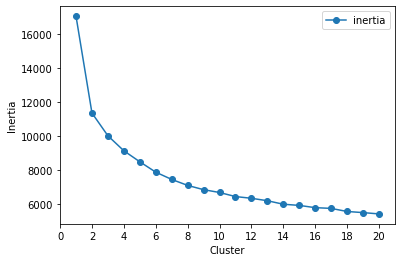

In [29]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

### explanation
It shows an strict elbow in 2, so the best clustering number is 2.

### Agglomerative clustering:
Agglomerative clustering is a hierarchical clustering algorithm that starts with individual data points and iteratively merges them into clusters based on their similarity. It belongs to the bottom-up approach of hierarchical clustering, also known as the agglomerative approach.

In [31]:
# Fit an agglomerative clustering model with two clusters
from sklearn.cluster import AgglomerativeClustering
# either set number of clusters or distance metric
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns])
data['agglom'] = ag.fit_predict(data[float_columns])

In [32]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,kmeans,agglom
0,1,1.138030,-2.073335,1.281628,1.130319,1.568466,3.150675,2.567947,2.487638,2.217515,...,2.022158,1.794344,1.307686,2.479386,2.003224,2.296076,2.682614,1.939736,1,0
1,1,1.711783,-0.353632,1.597721,1.713327,-0.826962,-0.481575,0.011104,0.571874,0.001392,...,1.502321,1.737118,-0.375612,-0.411700,-0.077623,1.087084,-0.228740,0.292501,1,0


In [33]:
#check how it is fit
agglom_groups = (data[['diagnosis','agglom']]
 .groupby(['agglom','diagnosis'])
 .size()
 .to_frame() #to change to dataframe
 .rename(columns={0:'number'}))
agglom_groups

number
agglom diagnosis        
0      0              20
       1             186
1      0             337
       1              26

In [34]:
# compare agglom_groups and kmeans_groups
# Comparing with KMeans results:
kmean_agglom_groups = (data[['diagnosis','agglom','kmeans']]
 .groupby(['diagnosis','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))
kmean_agglom_groups

number
diagnosis kmeans        
0         0          344
          1           13
1         0           33
          1          179

In [36]:
# Comparing results:
(data[['diagnosis','agglom','kmeans']]
 .groupby(['diagnosis','agglom','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
diagnosis agglom kmeans        
0         0      0            7
                 1           13
          1      0          337
1         0      0            7
                 1          179
          1      0           26

### Dendrogram:
A dendrogram plot is a graphical representation of hierarchical clustering results. Hierarchical clustering is a method used to group similar objects into clusters based on their similarity or dissimilarity. The dendrogram plot provides a visual way to understand the hierarchical relationships between the clusters and the objects they contain.

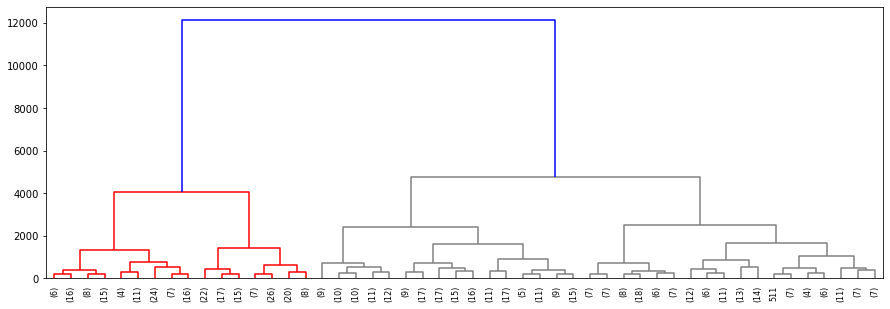

In [38]:
# plot dendrogram from agglomerative clustering
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color setup
red = 'red'
blue = 'blue'

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=50, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

### ROC-AUC:
(Receiver Operating Characteristic - Area Under the Curve) is a performance metric to evaluate the quality of a classification model. It assesses the model's ability to discriminate between the positive and negative classes by measuring the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity). If the number is 1 or near to that, it is a perfect classifier


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

In [40]:
y = (data['diagnosis'] == 1).astype(int)
X_with_kmeans = data.drop(['agglom', 'diagnosis'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

In [41]:
def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    # loop to 10 batches
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)

In [42]:
estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "0.9857142857142858"
Using kmeans cluster as input to Random Forest, roc-auc is "0.985383597883598"


### conclusion:
the amount of roc-auc if is almost 1 or close to 1, it would be better. Here, both of them are .98, but if we have more attention, the dataset without k-means column performs better that the data with k-means.